# 1. A nova era do beisebol

<p><img style="float: left;margin:5px 20px 5px 1px" src="images/79766_gal.jpg"></p>

Se você gosta de esportes e de dados, provavelmente você já deve ter assistido o filme o homem que mudou o jogo.

Esse filme não se trata de apenas de um filme sobre beisebol.

Trata-se de como um time com a menor folha salarial entre todos os times da liga profissional conseguiu uma sequência de 20 vitórias seguidas.

Como eles conseguiram isso?

**`Através de análise de dados para comprar e vender jogadores.`**

O gerente geral do Oakland Athletics, Billy Beane, e o analista, Peter Brand, utilizaram um novo sistema para escolher jogadores desacreditados com base em suas estatísticas. 

O objetivo era criar uma equipe cuja força era o grupo, sem medalhões.

A ideia era ao invés de contratar um único jogador que possa produzir os números que eles precisavam para vencer, eles procuravam 2 ou 3 jogadores para a mesma função que podiam gerar os mesmos números, porém com salários muito menores.

Hoje podemos dizer que há uma nova era de análise de dados no beisebol. 

E eu quero te provar o porquê estou dizendo isso.

<p><img style="float: right;margin:5px 5px 5px 20px" src="images/Aaron_Judge1.jpg"></p>

Este é Aaron Judge. 

Judge é um dos maiores jogadore da Major League Baseball. 

Ele atingiu o home run mais difícil já registrado. 

Como nós sabemos disso? `Statcast!`

O Statcast é um sistema de rastreamento de última geração que usa câmeras de alta resolução e equipamentos de radar para medir a localização e o movimento precisos de beisebol e jogadores de beisebol. 

Introduzido em 2015, os dados da Statcast estão revolucionando o jogo. 

As equipes estão participando de uma "corrida armamentista" na análise de dados, contratando analistas na tentativa de ganhar vantagem sobre a concorrência. 

Este <a href="https://www.youtube.com/watch?v=9rOKGKhQe8U">video</a> descrevendo o sistema é incrível.

Neste projeto, vamos organizar, analisar e visualizar dados do Statcast para comparar o Sr. Judge e outro (extremamente grande) companheiro de equipe dele. 

Vamos começar carregando os dados em nosso Notebook. 

Existem dois arquivos CSV, judge.csv e stanton.csv, ambos contendo dados do Statcast para 2015-2017. 

Você pode encontrar o dataset desse projeto em <a href="https://baseballsavant.mlb.com/about">Baseball Savan</a>.

O BaseballSavant é um site dedicado a fornecer correspondências de jogadores, métricas do Statcast e estatísticas avançadas de uma maneira simples e fácil de visualizar.

O glossário Statcast do MLB.com (Major League Baseball) pode ser útil em vários pontos do Projeto. Através de texto e vídeo acessíveis, eles explicam os conceitos de beisebol mais detalhadamente.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Load Aaron Judge's Statcast data
judge = pd.read_csv('datasets/judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('datasets/stanton.csv')

# 2. O que o Statcast pode medir?

Uma pergunta melhor seria: o que o Statcast não pode medir?

Começando com o arremessador, o Statcast pode medir pontos de dados simples, como velocidade. 

Ao mesmo tempo, o Statcast se aprofunda muito mais, medindo também o ponto de liberação e a taxa de rotação de cada arremesso.

Passando para os rebatedores, o Statcast é capaz de medir a velocidade de saída, o ângulo de lançamento e o vetor da bola quando ela sai do bastão. 

A partir daí, o Statcast também pode rastrear o tempo de espera e a distância projetada que uma bola percorre.

Vamos inspecionar as últimas cinco linhas do Jugde. 

Você verá que cada linha representa um arremesso. 

Você também verá que algumas colunas têm nomes complexos para quem não entende do jogo. 

Se isso não faz sentido agora, não se preocupe. Os relevantes serão explicados conforme necessário.

![](images/MjYyNTAxOQ.jpeg)

In [12]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


# 3. Aaron Judge e Giancarlo Stanton

<p><img style="float: left;margin:5px 20px 5px 1px" src="images/stanton.jpg"></p>

Este é Giancarlo Stanton.   

Eles são semelhantes de várias maneiras, uma delas é a quantidade de home runs que eles atingem. 

Stanton e Judge lideraram o baseball em home runs em 2017, com 59 e 52, respectivamente. 

São líderes isolados - o jogador em terceiro teve "apenas" 45 home runs.

Stanton e Judge também são diferentes em muitos aspectos. 

Um deles é a bola rebatida, que é qualquer bola rebatida que produz um resultado. 

A seguir, você encontrará a contagem de eventos de bola rebatida para cada jogador em 2017. 

In [13]:
# All of Aaron Judge's batted ball events in 2017
judge_events_2017 = judge[judge['game_date'].apply(lambda x: x[:4]) == '2017']['events']
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

# All of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017 = stanton[stanton['game_date'].apply(lambda x: x[:4]) == '2017']['events']
print("\nGiancarlo Stanton batted ball event totals, 2017:")
print(stanton_events_2017.value_counts())

Aaron Judge batted ball event totals, 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
sac_fly                        4
fielders_choice_out            4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64

Giancarlo Stanton batted ball event totals, 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
grounded_into_double_play     13
intent_walk                   13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly             

# 4. Analisando home runs com dados do Statcast

No beisebol, home run (denotado HR) é uma rebatida na qual o rebatedor é capaz de circular todas as bases, terminando na casa base e anotando uma corrida (junto com uma corrida anotada por cada corredor que já estava em base), com nenhum erro cometido pelo time defensivo na jogada que resultou no batedor-corredor avançando bases extras. O feito é geralmente conseguido rebatendo a bola sobre a cerca do campo externo entre os postes de falta (ou fazendo contato com um deles), sem que ela antes toque o chão.

Veja que, como já comentado, Stanton possui 59 home runs enquanto Judge possui 52.

Mas vamos entrar em seus perfis de sucesso com mais detalhes. 

Duas das métricas mais inovadoras do Statcast são o ângulo de lançamento e a velocidade de saída.

- Ângulo de lançamento: o ângulo vertical em que a bola deixa o taco de um jogador.
- Velocidade de saída: a velocidade da bola quando sai do bastão.

Esses novos dados mudaram a maneira como as equipes valorizam os lançadores e os arremessadores. 

Por quê? De acordo com o Washington Post:

"Bolas atingidas com um ângulo de lançamento alto têm mais chances de resultar em um acerto. Bata rápido o suficiente e no ângulo certo, eles se tornam home runs."

Vejamos a velocidade de saída em relação ao ângulo de lançamento e vamos nos concentrar apenas nos home runs (2015-2017). 

Os dois primeiros gráficos mostram pontos de dados. 

Os dois segundos mostram contornos suavizados para representar a densidade.

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

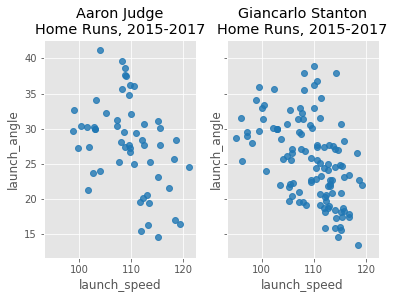

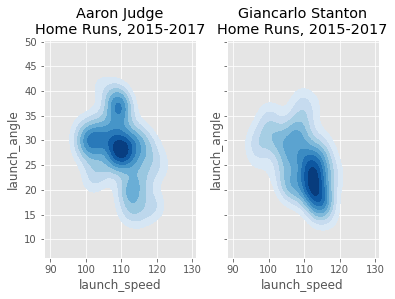

In [14]:
# Filter to include home runs only
judge_hr = judge[judge['events'] == 'home_run']
stanton_hr = stanton[stanton['events'] == 'home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr['launch_speed'], judge_hr['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr['launch_speed'], stanton_hr['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# 5. Home runs pela velocidade do arremesso

Parece que Stanton atinge seus home runs um pouco mais baixos e mais difíceis do que o Judge, embora isso precise ser tomado com um grão de sal, devido ao pequeno tamanho da amostra dos home runs.

Statcast não apenas mede a velocidade da bola que sai do taco, mas também mede a velocidade da bola que sai da mão do arremessador.

Podemos usar esses dados para comparar os home runs de Stanton e Judge em termos de velocidade de arremesso. 

A seguir, você encontrará boxplots que exibem os resumos de cinco números para cada jogador: mínimo, primeiro quartil, mediana, terceiro quartil e máximo.

Text(0.5, 1.0, 'Home Runs, 2015-2017')

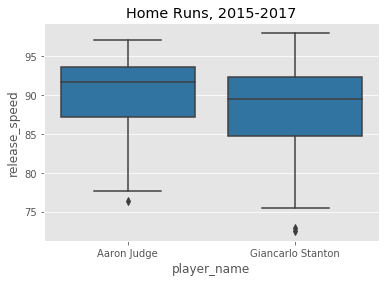

In [15]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(y='release_speed', x='player_name', data=judge_stanton_hr, color='tab:blue').set_title('Home Runs, 2015-2017')

# 6. Home runs por localização de arremesso? (I)

Assim, o Judge parece acertar suas jogadas com arremessos mais rápidos do que Stanton. 

Podemos chamar o Judge de rebatedor de bola rápida. 

Stanton parece agnóstico em relação à velocidade.

O Statcast rastreia o movimento e o tipo da arremesso, mas vamos para outra coisa: a `localização da arremesso`. 

O Statcast rastreia a zona em que o arremesso se cruza. 

A numeração da zona é assim (do ponto de vista do apanhador):

![](images/zone.png)

Podemos plotar isso usando um histograma 2D. 

Podemos visualizar cada zona como coordenadas em um gráfico 2D, sendo o canto inferior esquerdo (1,1) e o canto superior direito (3,3). 

Vamos configurar uma função para atribuir coordenadas x a cada passo.

In [16]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

# 7. Home runs por localização de arremesso? (II)

Vamos fazer o mesmo para as coordenadas do eixo y.

In [17]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

# 8. Zona de home run do Aaron Judge's 

Agora podemos aplicar as funções que criamos e construir nossos histogramas 2D. 

Primeiro, para Aaron Judge (novamente, para arremessos na zona de ataque que resultaram em home runs).

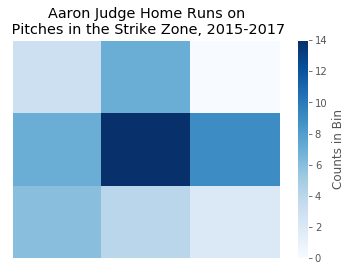

In [18]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins=3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# 9. Zona de home run de Giancarlo Stanton

E agora para Giancarlo Stanton.

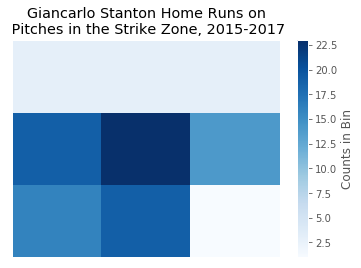

In [19]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)

# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_y'], bins=3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# 10. Os arremessadores adversários devem ter medo?

Alguns insghts:

- Stanton não bate muitos home runs em arremessos no terço superior da zona de ataque.

- Como praticamente todos os rebatedores de todos os tempos, os dois jogadores adoram arremessos no meio horizontal e vertical.

- Judge's least favorite home run pitch appears to be high-away while Stanton's appears to be low-away.

- Se descrevêssemos a zona de home run de Stanton, seria no meio. A zona de home run do Judge é muito mais ampla.

O grande insight de todo esse exercício: Aaron Judge e Giancarlo Stanton não são idênticos, apesar de suas semelhanças superficiais. 

Em termos de home runs, seus perfis de lançamento, assim como suas velocidades de arremesso e preferências de localização, são diferentes.

O que você acha? 

Os arremessadores adversários ainda devem estar assustados?

Se você quiser mais conteúdo relacionado ao Statcast, este <a href="https://www.youtube.com/watch?v=tzPKlQXo6hk">video</a> (Um ponto culminante de registros especiais do Statcast em 2017 no canal da MLB no YouTube) e este <a href="https://deadspin.com/major-league-baseballs-statcast-can-break-sabermetrics-1820987737">artigo</a> (O Statcast da Major League Baseball pode quebrar o sabermetrismo de Emma Baccellieri) são excelentes.



